# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Python Course/used_device_data.csv')

## Data Overview

- Observations
- Sanity checks

In [ ]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [ ]:
data.shape

(3454, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f



*   used_price is dependent variable
*   the only categorical types are brand_name, os, 4g and 5g



In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0




*   Most numerical data types could be more skewed right due to their average values being larger than the median values
*   34 different brands and 4 operating systems
*   The most popular operating system is Android
*   The ram column has very similar average and median values meaning there is not much skewness
*   The number of days a used/refurbished device has been used has the average lower than the median meaning it could be skewed left







In [ ]:
df = data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [ ]:
def histogram_boxplot(data, feature, figsize=(13, 8), kde=False, bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):

    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()

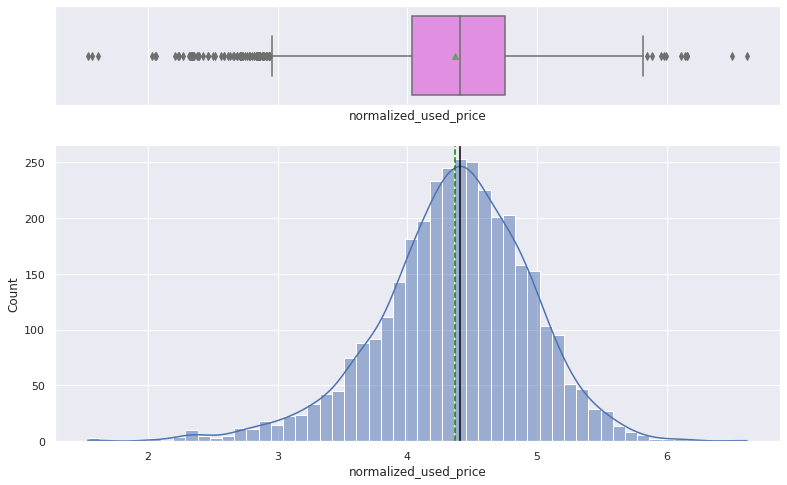

In [ ]:

histogram_boxplot(data, 'normalized_used_price', kde=True)

What does the distribution of normalized used device prices look like?

*  The distribution of normalized used price is normally distributed, but slightly skewed to the left
*   There are many outliers that indicate many used phones have an unusually high price



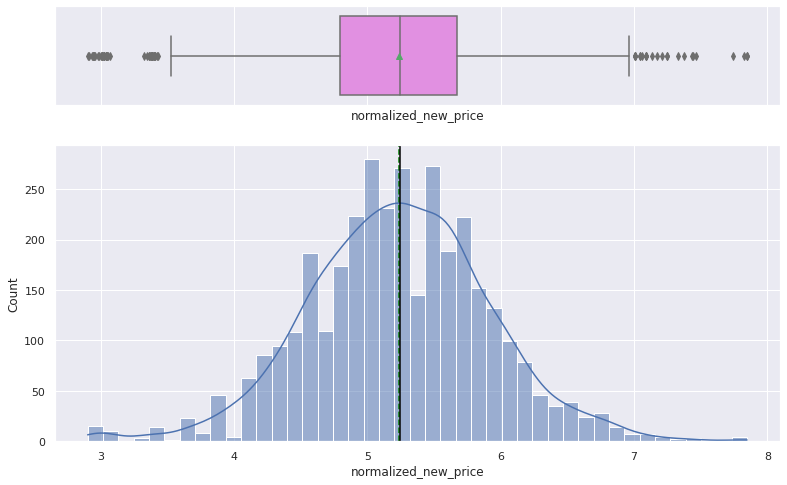

In [ ]:
histogram_boxplot(data, 'normalized_new_price', kde=True)



*   The noralized new price is normally distributed
*   There are many outliers that have unusually low and high prices



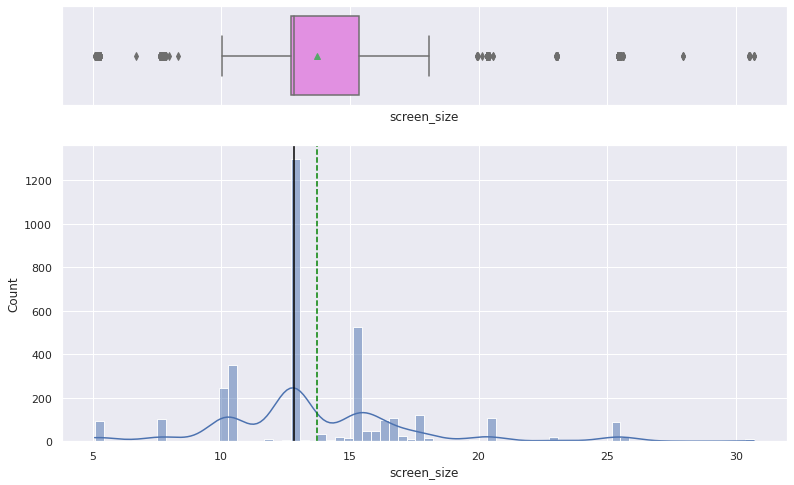

In [ ]:
histogram_boxplot(data, 'screen_size', kde=True)

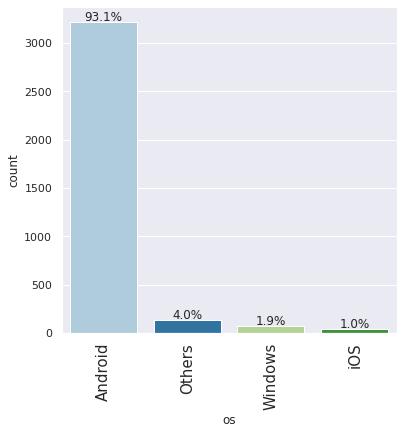

In [ ]:
labeled_barplot(data, "os", perc=True)

What percentage of the used device market is dominated by Android devices?

*   The used device market is dominated by androids at 93.1%





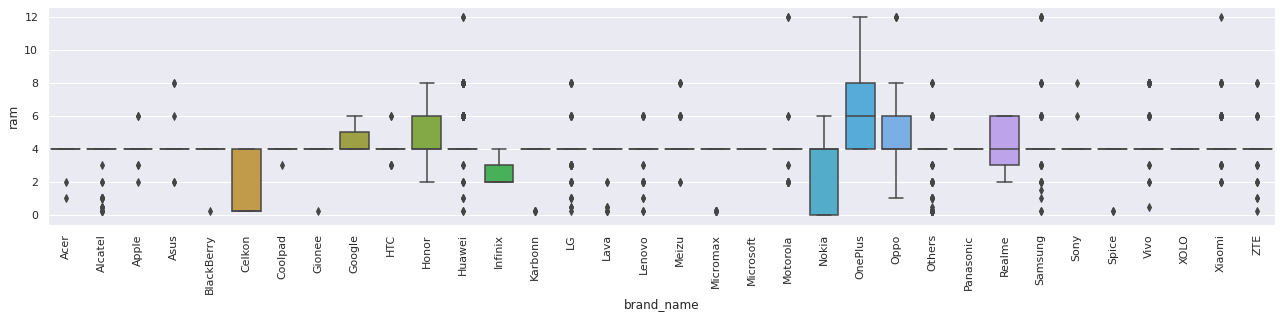

In [ ]:
plt.figure(figsize=(22,4))
sns.boxplot(data = df.sort_values("brand_name", ascending=True), x = "brand_name", y="ram");
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby("brand_name")["ram"].mean()

brand_name
Acer          3.901961
Alcatel       3.407025
Apple         4.000000
Asus          4.049180
BlackBerry    3.829545
Celkon        1.613636
Coolpad       3.954545
Gionee        3.933036
Google        4.533333
HTC           4.000000
Honor         4.603448
Huawei        4.655378
Infinix       2.600000
Karbonn       3.353448
LG            3.936567
Lava          3.277778
Lenovo        3.885965
Meizu         4.451613
Micromax      3.679487
Microsoft     4.000000
Motorola      3.943396
Nokia         2.420294
OnePlus       6.363636
Oppo          4.961240
Others        3.777888
Panasonic     4.000000
Realme        4.195122
Samsung       4.199413
Sony          4.069767
Spice         3.750000
Vivo          4.756410
XOLO          4.000000
Xiaomi        4.583333
ZTE           4.023214
Name: ram, dtype: float64

The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
*   The average amount of RAM for most brands is close to 4 GB
*   Celkon has the lowest average RAM and OnePlus has the highest average RAM
*   Microsoft only has 4 GB of RAM for their used devices
*   There are many outliers indicating high and low RAM amounts for most brands






In [ ]:
df = df[df["battery"]>4500]
print(df.shape)

(341, 15)


In [ ]:
(df.corr()["weight"]["battery"] , 2)

(0.757621634751397, 2)

A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
*   There are 341 devices that have large batteries with more than 4500 mAh
*   The correlation between the devices weight and battery is high at 0.8, meaning we can infer that as the battery size increase so does the weight



In [ ]:
df = df[df["screen_size"]>6]
print(df.shape)

(341, 15)


Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

*   There are 300 devices with screens larger than 6 inches



In [ ]:
df = df[df["selfie_camera_mp"]>8]
print(df.shape)

(73, 15)


A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?


*   There are 67 devices with selfie cameras that have more than 8MP




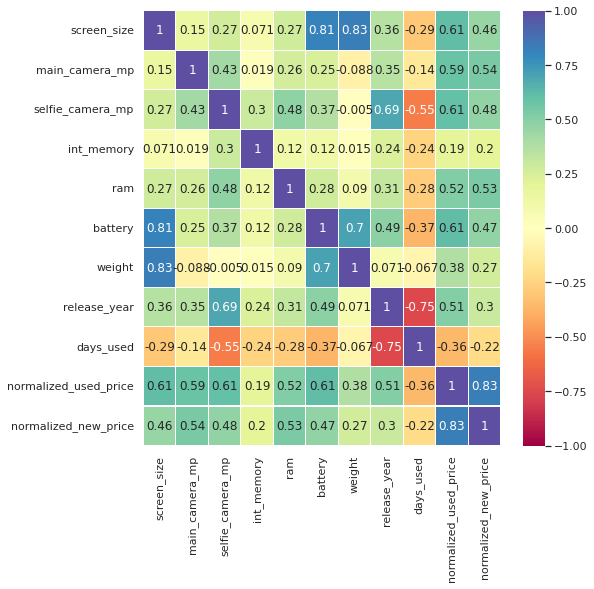

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral", linewidths=0.05);

Which attributes are highly correlated with the normalized price of a used device?

*   New and used price are most correlated, the higher the normalized new price is the higher normalized used price increases
*   Used price/screen size/selfie camera mp/battery all share a correlation slightly above average, meaning the better those features are it will increase used price
*   Used price an internal memory are not very correlated, meaning low or high memory won't affect the used price much
*   Used price and days used are negativley correlated, meaning the more days a device is used, the lower the used price is







## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
data = data.copy()

In [ ]:
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    data[col] = data[col].fillna(
        value=data.groupby(['release_year','brand_name'])[col].transform("median"))

In [ ]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    data[col] = data[col].fillna(
        value=data.groupby(['brand_name'])[col].transform("median"))

In [ ]:
data["main_camera_mp"] = data["main_camera_mp"].fillna(data["main_camera_mp"].fillna)

In [ ]:
data.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

**Feature engineering**

In [ ]:
data["years_since_release"] = 2021 - data["release_year"]
data.drop("release_year", axis=1, inplace=True)
data["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

**Outliers**

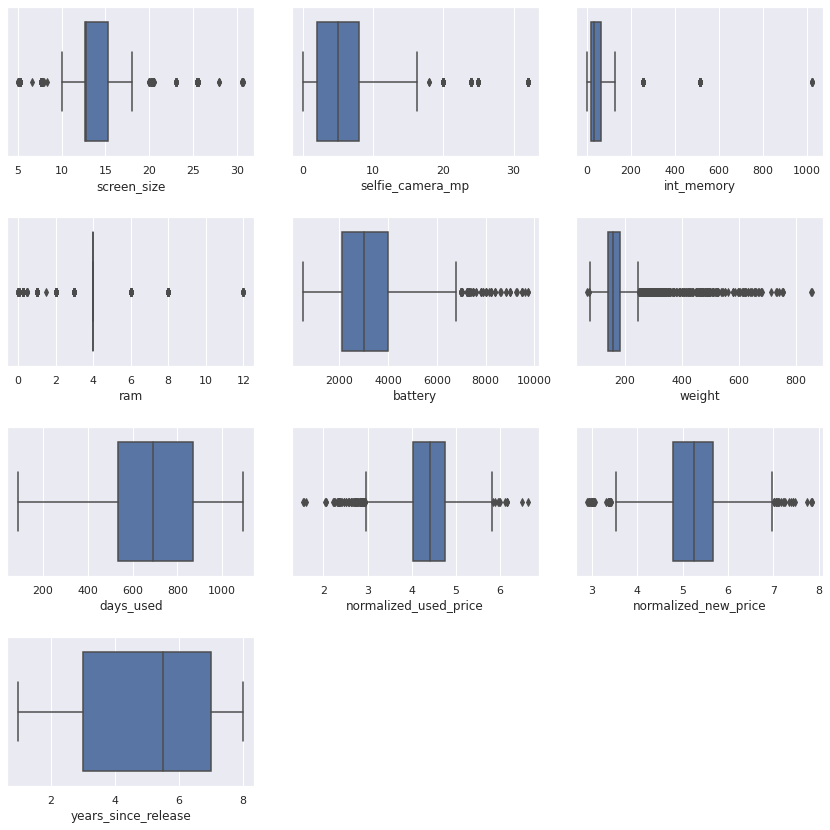

In [ ]:
num_cols = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 12))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=data, x=variable)
    plt.tight_layout(pad=2)

plt.show()

**Data preperation**

In [ ]:
X = data.drop(["normalized_used_price"], axis=1)
y = data["normalized_used_price"]

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g main_camera_mp  selfie_camera_mp  \
0      Honor  Android        14.50  yes   no           13.0               5.0   
1      Honor  Android        17.30  yes  yes           13.0              16.0   
2      Honor  Android        16.69  yes  yes           13.0               8.0   
3      Honor  Android        25.50  yes  yes           13.0               8.0   
4      Honor  Android        15.32  yes   no           13.0               8.0   

   int_memory  ram  battery  weight  days_used  normalized_new_price  \
0        64.0  3.0   3020.0   146.0        127              4.715100   
1       128.0  8.0   4300.0   213.0        325              5.519018   
2       128.0  8.0   4200.0   213.0        162              5.884631   
3        64.0  6.0   7250.0   480.0        345              5.630961   
4        64.0  3.0   5000.0   185.0        293              4.947837   

   years_since_release  
0                    1  
1                    1  
2    

In [ ]:
X = sm.add_constant(X)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,)
X.head()

,const,screen_size,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,years_since_release,...,main_camera_mp_20.1,main_camera_mp_12.6,main_camera_mp_16.3,main_camera_mp_22.6,main_camera_mp_19.0,main_camera_mp_21.5,main_camera_mp_21.2,main_camera_mp_8.1,main_camera_mp_1.2,main_camera_mp_22.5
0,1.0,14.50,5.0,64.0,3.0,3020.0,146.0,127,4.715100,1,...,0,0,0,0,0,0,0,0,0,0
1,1.0,17.30,16.0,128.0,8.0,4300.0,213.0,325,5.519018,1,...,0,0,0,0,0,0,0,0,0,0
2,1.0,16.69,8.0,128.0,8.0,4200.0,213.0,162,5.884631,1,...,0,0,0,0,0,0,0,0,0,0
3,1.0,25.50,8.0,64.0,6.0,7250.0,480.0,345,5.630961,1,...,0,0,0,0,0,0,0,0,0,0
4,1.0,15.32,8.0,64.0,3.0,5000.0,185.0,293,4.947837,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression

In [ ]:
olsmodel1 = sm.OLS(y_train, x_train).fit()
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.853
Model:                               OLS   Adj. R-squared:                  0.848
Method:                    Least Squares   F-statistic:                     167.5
Date:                   Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                           03:11:58   Log-Likelihood:                 159.73
No. Observations:                   2417   AIC:                            -155.5
Df Residuals:                       2335   BIC:                             319.3
Df Model:                             81                                         
Covariance Type:               nonrobust                                         
                                                                                                                                                                                    

## Model Performance Check

In [ ]:
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


def model_performance_regression(model, predictors, target):



    pred = model.predict(predictors)

    r2 = r2_score(target, pred)
    adjr2 = adj_r2_score(predictors, target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred))
    mae = mean_absolute_error(target, pred)
    mape = mape_score(target, pred)


    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.226496,0.175532,0.85315,0.847533,4.216428


In [ ]:
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test, y_test)
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.2396,0.188974,0.831419,0.815576,4.521237


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

In [ ]:
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(x_train)

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,feature,VIF
0,const,296.584933
1,screen_size,8.540319
2,selfie_camera_mp,2.950788
3,int_memory,1.426252
4,ram,2.356891
...,...,...
84,main_camera_mp_21.5,1.040245
85,main_camera_mp_21.2,1.036323
86,main_camera_mp_8.1,1.176746
87,main_camera_mp_1.2,1.041848


In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):

    adj_r2 = []
    rmse = []

    for cols in high_vif_columns:
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        olsmodel = sm.OLS(target, train).fit()

        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = ["normalized_new_price","brand_name_low_range"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_low_range,0.848056,0.230439
1,normalized_new_price,0.785997,0.273479


In [ ]:
col_to_drop = "brand_name_low_range"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


VIF after dropping  brand_name_low_range


,feature,VIF
0,const,296.584933
1,screen_size,8.540319
2,selfie_camera_mp,2.950788
3,int_memory,1.426252
4,ram,2.356891
...,...,...
84,main_camera_mp_21.5,1.040245
85,main_camera_mp_21.2,1.036323
86,main_camera_mp_8.1,1.176746
87,main_camera_mp_1.2,1.041848


In [ ]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train
df_pred["Fitted Values"] = olsmodel1.fittedvalues
df_pred["Residuals"] = olsmodel1.resid

df_pred.head()

,Actual Values,Fitted Values,Residuals
1744,4.261975,4.308270,-0.046295
3141,4.175156,3.900958,0.274198
1233,4.117410,4.457527,-0.340117
3046,3.782597,3.808115,-0.025518
2649,3.981922,3.912426,0.069496


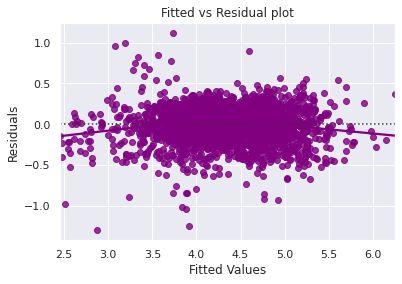

In [ ]:
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

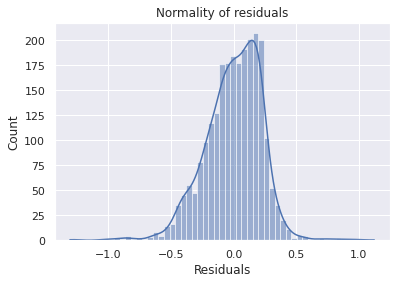

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

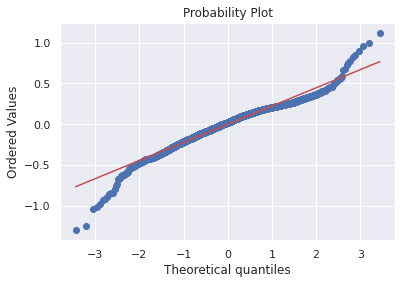

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [ ]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9680156707763672, pvalue=8.98553907358166e-23)

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train2)
lzip(name, test)

[('F statistic', 0.9517792085611969), ('p-value', 0.7970099642091497)]



*   **Residuals are homoscedastic**






## Final Model

In [ ]:
olsmodel_final = sm.OLS(y_train, x_train2).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.853
Model:                               OLS   Adj. R-squared:                  0.848
Method:                    Least Squares   F-statistic:                     167.5
Date:                   Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                           03:13:48   Log-Likelihood:                 159.73
No. Observations:                   2417   AIC:                            -155.5
Df Residuals:                       2335   BIC:                             319.3
Df Model:                             81                                         
Covariance Type:               nonrobust                                         
                                                                                                                                                                                    

## Actionable Insights and Recommendations

# Insights

*   The new devices have a higher used price because people want better features and technoligical advances that would increase the price of the new or used device. The demand and supply of new and used devices are correlated highly.
*  Brand name, release year, new price, and days used all affect the used price. These factors are important because they give details about cosmetic issues and resale value. Originality plays a role and people don't want to buy a fake branded phone.
*   Battery and days used are negativley correlated, meaning the battery could be heavily affected by the number of days the device was used.
*   The average used price is 110 euros, meaning it is very affordable for the average person.

# Reccomendations
*   Collecting data on income and device brand preffered should be done to gain a better understanding of the target market. Also age of customers since younger people want the newest technology.
*   Phones that are newly released should be focused on the most since they have a high resale value. Battery tests shoudl also be included before purchase since that seems to affect the byers decision.
*   Discontinue the sale of Celkon since all of their devices have very low RAM.
*   Focus on reselling popular brands such as Apple, Android, and Samsung.













___